In [9]:
import numpy as np
import pandas as pd
#%matplotlib inline
import re
import os
import math
import numpy as np
import pandas as pd
import joblib
import warnings
import time
import matplotlib.pyplot as plt

# Importamos nuestras funciones
import sys
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, classification_report
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN, SpectralClustering, Birch
from sklearn.decomposition import PCA


path_old = 'D:\OneDrive - UNICAN\Escritorio\Conchas\CSV_original_sonda_renombrado'


dataframes = []
for csv in os.listdir(path_old):
    df = pd.read_csv(path_old + '/' + csv)
    nombre = csv.split('_')[0]
    df.index = pd.MultiIndex.from_tuples([(nombre, X, Y ) for X, Y in df.index],
                                                   names=["Muestra", "X", "Y"])
    dataframes.append(df)

data = pd.concat(dataframes)

In [11]:
data

178.6   182.29   185.98   189.67   193.35   197.03  \
Muestra  X      Y                                                              
arq235   72.384 9.042   1028.75   963.50   747.61   621.88   430.70   486.88   
         72.434 9.042    787.07   703.63   624.03   482.20   374.99   425.30   
         72.484 9.042    776.27   588.28   564.13   450.40   372.63   383.43   
         72.534 9.042    760.81   745.37   637.66   473.13   331.43   444.22   
         72.584 9.042    723.16   683.73   623.03   517.39   418.49   442.69   
...                         ...      ...      ...      ...      ...      ...   
moderna7 39.303 60.864    -6.62  1155.48  1664.19  2201.00  2879.14  4513.40   
         39.534 60.864    -7.98  1038.03  1662.22  2446.99  3149.07  4730.26   
         39.611 60.864    -8.08  1143.59  1876.66  2384.35  3185.84  4646.74   
         39.688 60.864    -8.69  1365.98  1943.48  2503.82  3127.75  4528.28   
         39.765 60.864    -8.65  1205.53  1657.72  2657.43  3138.11  4122.72   

                         200.71   204.38   208.06   211.73  ...  2780.04  \
Muestra  X      Y                                           ...            
arq235   72.384 9.042    308.72   260.39   178.11    71.15  ...   408.31   
         72.434 9.042    334.07   259.35   228.05   291.85  ...   227.56   
         72.484 9.042    316.45   292.49   194.04    93.33  ...   246.14   
         72.534 9.042    229.09   303.10   295.60   134.88  ...   326.13   
         72.584 9.042    371.39   320.67   309.03   119.03  ...   223.88   
...                         ...      ...      ...      ...  ...      ...   
moderna7 39.303 60.864  5642.24  5253.08  3907.60  2654.07  ...   217.97   
         39.534 60.864  6076.96  5770.40  4029.24  2939.26  ...    22.00   
         39.611 60.864  5651.79  5157.19  3903.87  2756.64  ...    33.42   
         39.688 60.864  5411.07  5249.47  3914.89  2932.66  ...    -0.04   
         39.765 60.864  5043.54  4804.36  3657.71  2767.38  ...   300.37   

                        2782.2  2784.36  2786.52  2788.67  2790.83  2792.98  \
Muestra  X      Y                                                             
arq235   72.384 9.042   428.45   444.83   410.26   460.43   450.42   465.98   
         72.434 9.042   234.34   225.83   300.13   333.08   238.88   345.28   
         72.484 9.042   259.06   363.89   339.70   328.73   385.54   305.17   
         72.534 9.042   362.06   393.94   338.34   450.53   367.36   388.17   
         72.584 9.042   261.45   213.92   257.47   287.00   285.08   258.43   
...                        ...      ...      ...      ...      ...      ...   
moderna7 39.303 60.864   21.67    99.94   116.05   117.55    99.66    39.24   
         39.534 60.864    9.69    36.10    84.08    30.42   109.17    38.26   
         39.611 60.864   93.89    75.80    95.79   121.85    74.14   122.64   
         39.688 60.864    8.52     2.46    65.03    81.66     4.49    66.65   
         39.765 60.864  343.53   186.37   104.09    54.83   212.46   188.69   

                        2795.13  2797.28  2799.43  
Muestra  X      Y                                  
arq235   72.384 9.042    473.22   561.05   483.62  
         72.434 9.042    279.39   284.46   323.20  
         72.484 9.042    395.31   398.72   416.96  
         72.534 9.042    440.83   499.00   369.53  
         72.584 9.042    204.34   287.33   216.52  
...                         ...      ...      ...  
moderna7 39.303 60.864    81.76    68.96    -0.33  
         39.534 60.864    12.76    45.32     5.25  
         39.611 60.864    81.17   143.12    -0.19  
         39.688 60.864   102.76    77.56    -0.09  
         39.765 60.864    25.20   120.33    57.44  

[39147 rows x 924 columns]

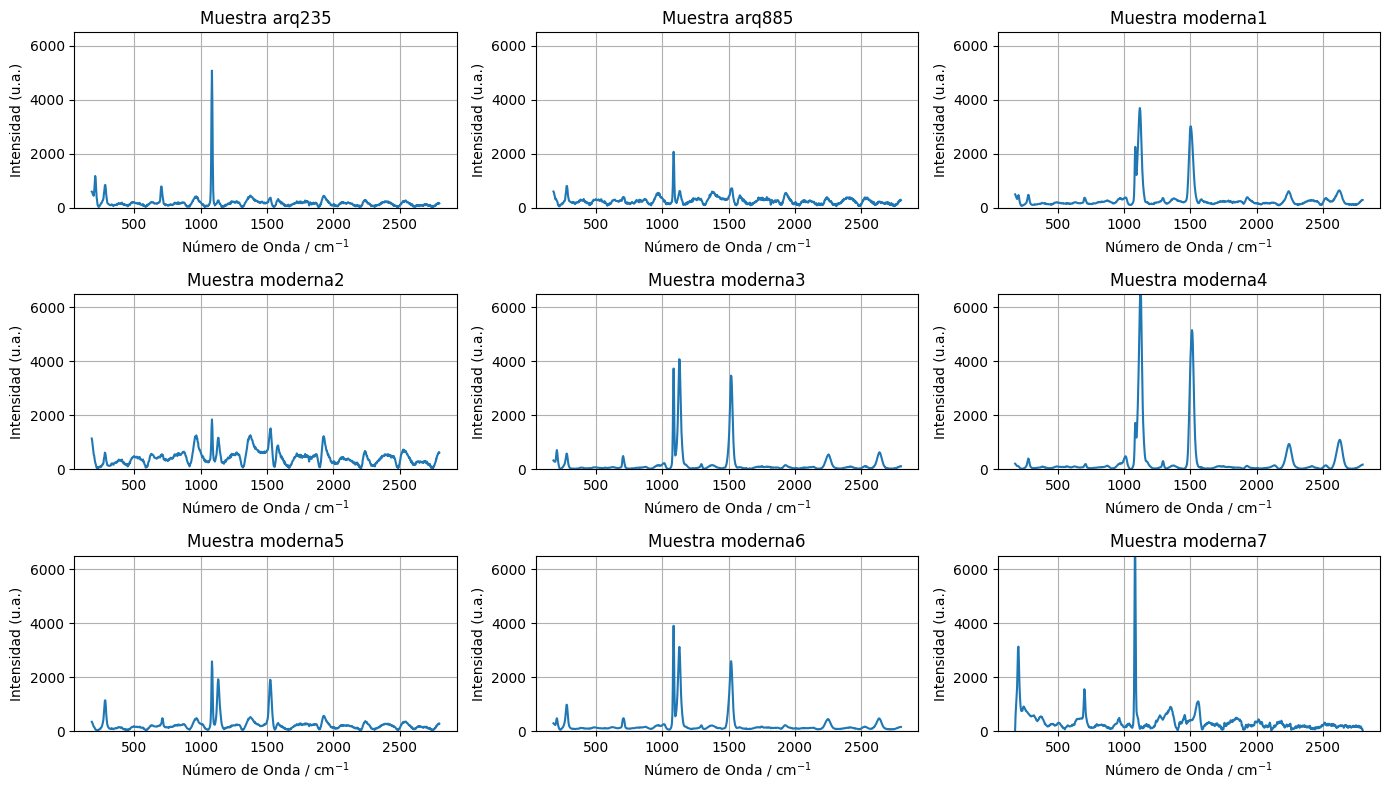

In [13]:
def avg_spectrum_all(data, muestras ):
    #data = pd.concat(dataframes, axis=0)
    fig, axes = plt.subplots(3, 3, figsize=(14, 8))
    # Itera sobre las muestras y representa cada una en su subplot
    for i, muestra in enumerate(muestras):
        data_muestra = data[data.index.get_level_values('Muestra') == f'{muestra}']
        wavenumber = data_muestra.columns.get_level_values(0).astype(float)
        # Calcula las intensidades medias para cada número de onda
        mean_intensity = data_muestra.mean(axis=0)

        

        # Calcula la posición del subplot en la matriz de subplots
        fila = i // 3
        columna = i % 3

        # Representa el espectro medio en el subplot correspondiente
        axes[fila, columna].plot(wavenumber, mean_intensity, label=f'Muestra {muestra}')
        axes[fila, columna].set_xlabel("Número de Onda / cm$^{-1}$")
        axes[fila, columna].set_ylabel('Intensidad (u.a.)')
        axes[fila, columna].set_title(f'Muestra {muestra}')
        axes[fila, columna].set_ylim(0, 6500)
        axes[fila, columna].grid(True)

    # Ajusta el espaciado entre subplots
    plt.tight_layout()

    

    # Muestra los subplots
    plt.show()

avg_spectrum_all(data, data.index.get_level_values('Muestra').unique().tolist())